# Import statements

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb


# Reading csv

In [3]:
df=pd.read_csv("tested.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.isnull().values.sum() # null count

414

In [6]:
# droping unnecessary columns

new_df=df.drop(["PassengerId","Name","Parch","Ticket","Cabin","Embarked"],axis=1)

In [7]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,34.5,0,7.8292
1,1,3,female,47.0,1,7.0000
2,0,2,male,62.0,0,9.6875
3,0,3,male,27.0,0,8.6625
4,1,3,female,22.0,1,12.2875
...,...,...,...,...,...,...
413,0,3,male,NaN,0,8.0500
414,1,1,female,39.0,0,108.9000
415,0,3,male,38.5,0,7.2500
416,0,3,male,NaN,0,8.0500


# Feature engg.

In [8]:
# Handeling categorical columns

dummy=pd.get_dummies(new_df["Sex"],drop_first=True,prefix="Sex",dtype=int)
dummy

,Sex_male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [9]:
new_df=pd.concat([new_df,dummy],axis=1)


In [10]:
new_df.drop("Sex",axis=1,inplace=True)


In [11]:
new_df["Age"].fillna(new_df["Age"].mean(),inplace=True)


In [12]:
new_df["Survived"].fillna(new_df["Survived"].mean(),inplace=True)

In [13]:
new_df["Sex_male"].fillna(new_df["Sex_male"].mean(),inplace=True)

In [14]:
new_df["Fare"].fillna(new_df["Fare"].mean(),inplace=True)

In [15]:
new_df["Pclass"].fillna(new_df["Pclass"].mean(),inplace=True)

In [16]:
new_df["SibSp"].fillna(new_df["SibSp"].mean(),inplace=True)

# Scaling the values

In [17]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
np_df=scalar.fit_transform(new_df)

In [18]:
new_df=pd.DataFrame(np_df,columns=['Survived',	'Pclass',	'Sex',	'Age',	'SibSp',	'Fare'])

In [19]:
x=new_df.drop('Survived',axis=1)
y=new_df['Survived']


# Train and Test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, 
                                                    random_state=1)

# Training Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [24]:
predictions=logmodel.predict(x_test)
predictions

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.])

In [25]:
np.array(y_test)

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.])

# SCORE OF THE MODEL

In [26]:
logmodel.score(x_test,y_test)

1.0

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
accuracy=confusion_matrix(y_test,predictions)

<Axes: >

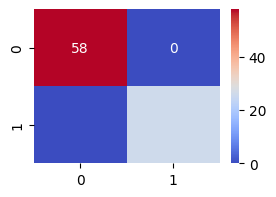

In [31]:
fig=plt.figure(figsize=(3,2))
sb.heatmap(accuracy,annot=True,cmap='coolwarm')

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy=accuracy_score(y_test,predictions)
accuracy

1.0

# Model Report

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        58
         1.0       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

